### Preparation

In [1]:
conda install seaborn matplotlib scipy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\dioog\Instacart Basket Analysis"

In [3]:
ords_prods_merge = pd.read_csv(os.path.join(path, "02 Data", "02 Prepared data", "orders_products_merged_Vs2.csv"))

### Bar chart

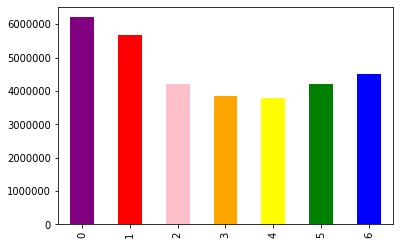

In [8]:
bar = ords_prods_merge["order_day_of_week"].value_counts().sort_index().plot.bar(color =["purple", "red", "pink", "orange", "yellow", "green", "blue"])

In [9]:
bar.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "bar_orders_dow.png"))

### Histogram

##### removing outliers

In [10]:
ords_prods_merge.loc[ords_prods_merge["prices"] > 100, "prices"] = np.nan

##### creating the histogram

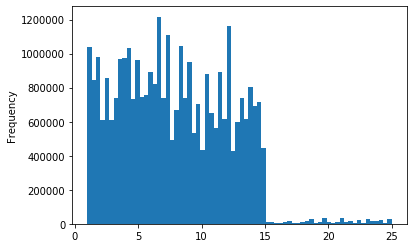

In [13]:
hist = ords_prods_merge["prices"].plot.hist(bins = 70)

In [14]:
hist.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "hist_prices.png"))

### Line Chart

##### creating a sample

In [4]:
np.random.rand(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [16]:
dev

array([False, False, False, ...,  True,  True, False])

In [5]:
big = ords_prods_merge[dev]

In [6]:
small = ords_prods_merge[~dev]

In [7]:
len(big)+len(small)

32404859

In [12]:
small.shape

(9717350, 30)

##### creating a column subset

In [21]:
df_2 = small[["order_day_of_week", "prices"]]

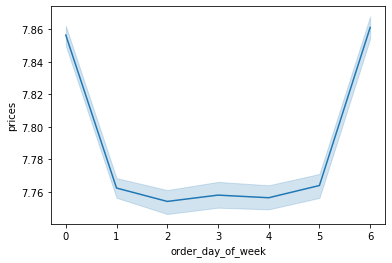

In [24]:
line = sns.lineplot(data = df_2, x= "order_day_of_week", y = "prices")

In [25]:
line.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "line_dow_prices.png"))

### Exporting small as a subset of ords_prods_merge to use in future exercises due to memory errors

In [13]:
small.to_csv(os.path.join(path, "02 Data", "02 prepared data", "orders_products_merged_Vs_Small.csv"))



# Exercise 4.9 - Part 2


###  import your most up-to-date project data 

In [3]:
df = pd.read_pickle(os.path.join(path, "02 Data", "02 Prepared data", "orders_products_customers.pkl"))

In [4]:
df.head()

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0_x,Unnamed: 0.1.1,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,0,0,0,0,2539329,1,1,2,8,NaN,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,1,1,1,2398795,1,2,3,7,15.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,3,3,3,3,2254736,1,4,4,7,29.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,5,5,5,5,3367565,1,6,2,7,19.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,7,7,7,7,3108588,1,8,1,14,14.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df.shape

(9717350, 40)


### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.


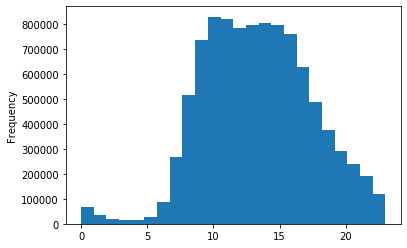

In [6]:
hist_order_hour_of_day = df["order_hour_of_day"].plot.hist(bins = 24)

In [ ]:
# The histogram demonstrates that orders start to increase sharply early in the day, at 7am. 
# Between 9am and 16h trading is at its most intensive, registering 700000-85000 orders per hour. 
# After 16h the number of order per hour starts to decrease continuasly.
# By 22h the number of order per hour is already below 200000 orders per hour, where it stays until 7am next morning.

In [7]:
# exporting png

hist_order_hour_of_day.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "hist_order_hour_of_day.png"))


### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.


In [9]:
df.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_x', 'Unnamed: 0.1.1',
       'order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'Busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'Loyalty_flag',
       'spending_flag', 'avg_expense', 'Spending_flag', 'median_frequency',
       'Frequency_flag', 'Unnamed: 0_y', 'name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

In [11]:
df["Loyalty_flag"].value_counts (dropna = False)

Regular customer    4759395
Loyal customer      3086028
New customer        1871927
Name: Loyalty_flag, dtype: int64

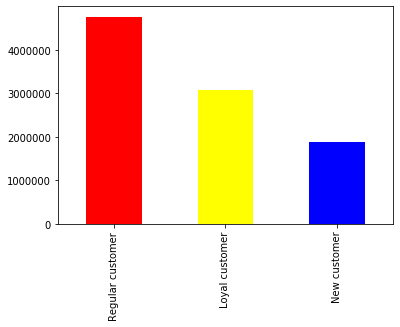

In [13]:
bar_order_loyalty = df["Loyalty_flag"].value_counts().plot.bar(color =["red", "yellow", "blue"])

In [ ]:
# Regular custumers place more orders in total. 
# That is not surprising considering that there are almost as much regular customers as loyal and new customers combined. 
# Regular customers - 4759395, Loyal customers - 3086028, New customers - 1871927

In [17]:
# exporting png

bar_order_loyalty.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "bar_order_loyalty.png"))


### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)


In [14]:
df_3 = df[["prices", "order_hour_of_day"]]

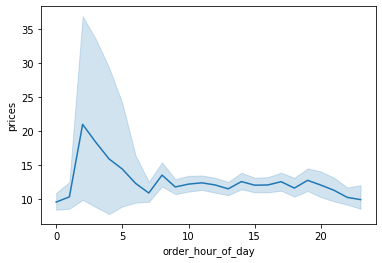

In [16]:
line_expenditure_hour_of_day = sns.lineplot(data = df_3, x= "order_hour_of_day", y = "prices")

In [18]:
# exporting png

line_expenditure_hour_of_day.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "line_expenditure_hour_of_day.png"))


### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. 

### First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:

### In a markdown cell beneath your line chart, describe what the line chart shows.


In [ ]:
name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', '"income"', '_merge'],
      dtype='object')

In [19]:
df_4 = df[["age", "n_dependants", "fam_status", "income"]]

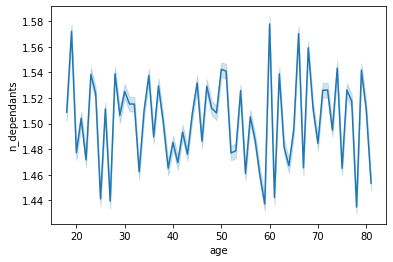

In [23]:
line_age_family_status = sns.lineplot(data = df_4, x= "age", y = "n_dependants")

In [ ]:
# This option of visualization does not seem is not very helpful. A clear patttern is not obvious. 
# On average  customers have around 1.5 dependents

In [24]:
# exporting png

line_age_family_status.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "line_age_family_status.png"))


### You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.


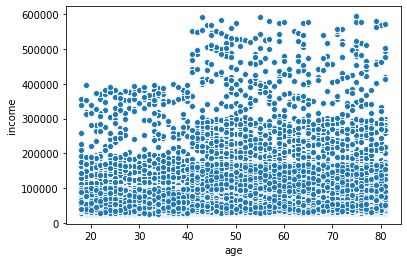

In [25]:
scatter_age_income = sns.scatterplot(data = df_4, x= "age", y = "income")

In [ ]:
# The scatterplot shows that customers younger than 40 have tend to have an income lower than 40000$. 
# Some of the customers older than 40 have an income between 40000$ and 60000$. 

In [28]:
# exporting png

scatter_age_income.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "scatter_age_income.png"))